In [4]:
!git remote add origin https://github.com/athaatha15/KLASIFIKASI_PENYEBAB_GANGGUAN_PADA_JARINGAN_TRANSMISI_TENAGA_LISTRIK_MENGGUNAKAN_METODE_CNN.git


/Users/agatha/.zshenv:1: no such file or directory: usr/libexec/java_home
fatal: not a git repository (or any of the parent directories): .git


In [7]:
!git add .

/Users/agatha/.zshenv:1: no such file or directory: usr/libexec/java_home
fatal: not a git repository (or any of the parent directories): .git


In [8]:
!git commit -m "Coding  KLASIFIKASI PENYEBAB GANGGUAN PADA JARINGAN TRANSMISI TENAGA LISTRIK MENGGUNAKAN METODE CONVOLUTIONAL NEURAL NETWORK"

/Users/agatha/.zshenv:1: no such file or directory: usr/libexec/java_home
fatal: not a git repository (or any of the parent directories): .git


In [9]:
!git push origin main

/Users/agatha/.zshenv:1: no such file or directory: usr/libexec/java_home
fatal: not a git repository (or any of the parent directories): .git


Deteksi Gangguan Listrik CNN

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# Langkah 1: Persiapan Data
data_hewan_1 = pd.read_csv('/content/drive/MyDrive/Gangguan/Coba/Tes 5 Hewan 20230824 Buntok-Teweh1.CSV', encoding='latin1')
data_pohon_1 = pd.read_csv('/content/drive/MyDrive/Gangguan/Coba/3 OK Pohon 20230408 Buntok -Teweh 2.CSV', encoding='latin1')
data_petir = pd.read_csv('/content/drive/MyDrive/Gangguan/OKE_FIX/Data Test/Data/3 DATA SET PETIR 20231123 Satui - AA 1.csv', encoding='latin1')

# Set label
data_hewan_1['label'] = 'hewan'
data_pohon_1['label'] = 'pohon'
data_petir['label'] = 'petir'

# Merge data
data = pd.concat([data_hewan_1, data_pohon_1, data_petir], ignore_index=True)

# Drop '>DATE(0/DATE)' and ' TIME(1/TIME)' columns
data.drop(['>DATE(0/DATE)', ' TIME(1/TIME)'], axis=1, inplace=True)

# Encoding label
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Fill missing values with 0
data.fillna(0, inplace=True)

# Split data into features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=48)

# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert target to one-hot encoding
y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Conv1D(filters=68, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with one-hot encoded targets
history = model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_val, y_val_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Loss:", loss)
print("Accuracy:", accuracy)


Epoch 1/25
307/307 [==============================] - 3s 8ms/step - loss: 0.1783 - accuracy: 0.9567 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 2/25
307/307 [==============================] - 3s 8ms/step - loss: 0.0204 - accuracy: 0.9998 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 3/25
307/307 [==============================] - 3s 9ms/step - loss: 0.0090 - accuracy: 0.9997 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/25
307/307 [==============================] - 4s 13ms/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 6.1827e-04 - val_accuracy: 1.0000
Epoch 5/25
307/307 [==============================] - 2s 8ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 3.2931e-04 - val_accuracy: 1.0000
Epoch 6/25
307/307 [==============================] - 2s 8ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 1.9896e-04 - val_accuracy: 1.0000
Epoch 7/25
307/307 [==============================] - 4s 13ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.4585e-04 - val_accur

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 86, 68)            272       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 43, 68)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2924)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                146250    
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 153       
                                                      

In [159]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities for each class
predicted_probabilities = model.predict(X_test)
# Get predicted class labels
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Convert one-hot encoded labels back to categorical labels
y_test_categorical = np.argmax(y_test_encoded, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_categorical, predicted_classes)
precision = precision_score(y_test_categorical, predicted_classes, average='weighted')
recall = recall_score(y_test_categorical, predicted_classes, average='weighted')
f1 = f1_score(y_test_categorical, predicted_classes, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


61/61 [==============================] - 1s 10ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# Load new data for prediction
new_data = pd.read_csv('/content/drive/MyDrive/Gangguan/OKE_FIX/Data Test/DATA TES/PETIR/4 PETIR 20231124 Teweh-Buntok1.CSV', encoding='latin1')

def preprocess_data(data):
    # Drop unnecessary columns
    columns_to_drop = []
    if '>DATE(0/DATE)' in data.columns and ' TIME(1/TIME)' in data.columns:
        columns_to_drop.extend(['>DATE(0/DATE)', ' TIME(1/TIME)'])

    if '<DATE(0/DATE)' in data.columns and ' TIME(1/TIME)' in data.columns:
        columns_to_drop.extend(['<DATE(0/DATE)', ' TIME(1/TIME)'])

    # Drop the columns
    data.drop(columns_to_drop, axis=1, inplace=True)

    # Ensure new data has the same number of features as expected by the model
    required_features = 48
    current_features = data.shape[1]
    if current_features < required_features:
        # Add additional features if the number of features is less than expected
        additional_features = required_features - current_features
        for i in range(additional_features):
            data[f'additional_feature_{i}'] = 0
    elif current_features > required_features:
        # Remove excess features if the number of features is more than expected
        data = data.iloc[:, :required_features]

    return data

# Apply preprocessing to new data
new_data = preprocess_data(new_data)

# Ensure the shape of the new data is correct
print("Shape of new data after preprocessing:", new_data.shape)

# Apply StandardScaler to new data
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(new_data)

# Add padding if the sequence length is less than 48
X_new_padded = pad_sequences(X_new_scaled, maxlen=80, padding='post', truncating='post')

# Reshape data for CNN
X_new_padded = X_new_padded.reshape(X_new_padded.shape[0], X_new_padded.shape[1], 1)

# Make predictions on new data
predictions = model.predict(X_new_padded)

# Convert probabilities to classes
if predictions.ndim > 1:
    predicted_classes = np.argmax(predictions, axis=-1)
else:
    predicted_classes = np.argmax(predictions)

# Ensure predicted_classes is a 1D array
predicted_classes = np.ravel(predicted_classes)

# Define class labels
class_labels = ["Kerusakan akibat Hewan", "Kerusakan Akibat Pohon", "Kerusakan Akibat Petir"]

# Menghitung jumlah prediksi untuk masing-masing kelas
counts = np.bincount(predicted_classes)

# Menghitung total prediksi
total_predictions = len(predicted_classes)

# Menghitung persentase untuk masing-masing kelas
class_percentages = counts / total_predictions * 100

# Menampilkan hasil
for label, percentage in zip(class_labels, class_percentages):
    print(f"{label}: {percentage:.2f}%")

def hitung_pola_degree(data):
    # Ambil fitur yang relevan untuk perhitungan pola degree
    relevant_features = data[:, :3]

    # Hitung rata-rata dari setiap kolom
    average_degree = np.mean(relevant_features, axis=0)

    return average_degree

# Kemudian Anda dapat menggunakan fungsi ini untuk menghitung pola degree dari data pelatihan
pola_degrees_pohon = hitung_pola_degree(data_pohon)
pola_degrees_hewan = hitung_pola_degree(data_hewan)
pola_degrees_petir = hitung_pola_degree(data_petir)


Shape of new data after preprocessing: (12336, 48)
386/386 [==============================] - 1s 3ms/step
Kerusakan akibat Hewan: 41.79%
Kerusakan Akibat Pohon: 0.00%
Kerusakan Akibat Petir: 58.21%


InvalidIndexError: (slice(None, None, None), slice(None, 3, None))

46/46 [==============================] - 0s 2ms/step


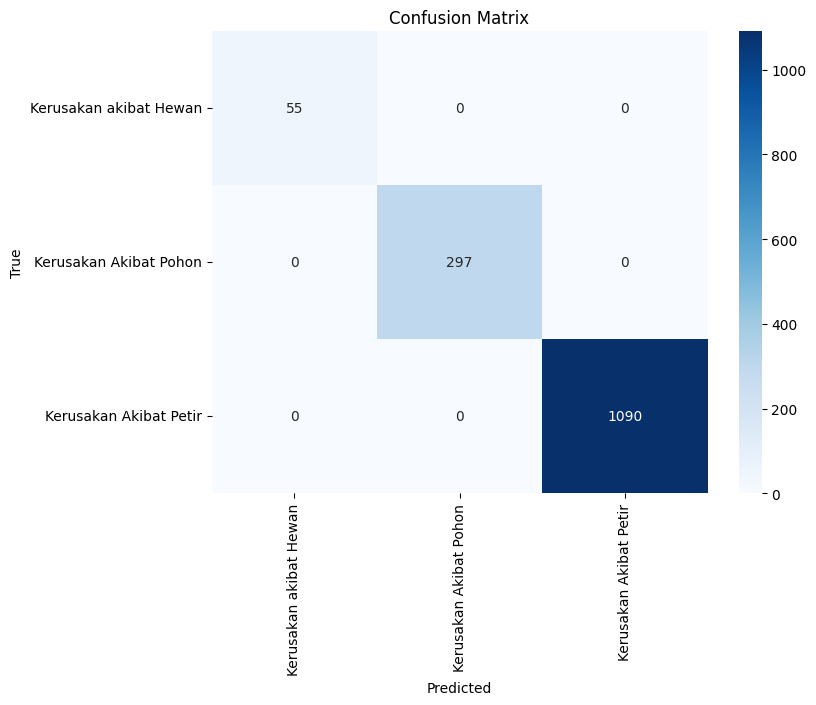

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi kelas menggunakan model Anda
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)  # Menggunakan axis=1 karena kita ingin argmax per baris

# Hitung confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Buat plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()